# Cusum and EWMA Charts

In [46]:
library(qcc)

In [47]:
weights <- data.frame(x = c(
    1045,1055,1037,1064,1095,1008,1050,1087,1125,1146,
    1139,1169,1151,1128,1238,1125,1163,1188,1146,1167))

trial <- data.frame(x = c(
    9.45, 7.99, 9.29, 11.66, 12.16, 10.18, 8.04, 11.46, 
    9.20, 10.34, 9.03, 11.47, 10.51, 9.40, 10.08, 9.37, 
    10.62, 10.31, 8.52, 10.84, 10.90, 9.33, 12.29, 11.50, 
    10.60, 11.08, 10.38, 11.62, 11.31, 10.52))
    
hardbake.p1 <- rbind(
    c(1.3235, 1.4128, 1.6744, 1.4573, 1.6914),
    c(1.4314, 1.3592, 1.6075, 1.4666, 1.6109),
    c(1.4284, 1.4871, 1.4932, 1.4324, 1.5674),
    c(1.5028, 1.6352, 1.3841, 1.2831, 1.5507),
    c(1.5604, 1.2735, 1.5265, 1.4363, 1.6441),
    c(1.5955, 1.5451, 1.3574, 1.3281, 1.4198),
    c(1.6274, 1.5064, 1.8366, 1.4177, 1.5144),
    c(1.4190, 1.4303, 1.6637, 1.6067, 1.5519),
    c(1.3884, 1.7277, 1.5355, 1.5176, 1.3688),
    c(1.4039, 1.6697, 1.5089, 1.4627, 1.5220),
    c(1.4158, 1.7667, 1.4278, 1.5928, 1.4181),
    c(1.5821, 1.3355, 1.5777, 1.3908, 1.7559),
    c(1.2856, 1.4106, 1.4447, 1.6398, 1.1928),
    c(1.4951, 1.4036, 1.5893, 1.6458, 1.4969),
    c(1.3589, 1.2863, 1.5996, 1.2497, 1.5471),
    c(1.5747, 1.5301, 1.5171, 1.1839, 1.8662),
    c(1.3680, 1.7269, 1.3957, 1.5014, 1.4449),
    c(1.4163, 1.3864, 1.3057, 1.6210, 1.5573),
    c(1.5796, 1.4185, 1.6541, 1.5116, 1.7247),
    c(1.7106, 1.4412, 1.2361, 1.3820, 1.7601),
    c(1.4371, 1.5051, 1.3485, 1.5670, 1.4880),
    c(1.4738, 1.5936, 1.6583, 1.4973, 1.4720),
    c(1.5917, 1.4333, 1.5551, 1.5295, 1.6866),
    c(1.6399, 1.5243, 1.5705, 1.5563, 1.5530),
    c(1.5797, 1.3663, 1.6240, 1.3732, 1.6887)
)

hardbake.p2 <- rbind(
    c(1.4483, 1.5458, 1.4538, 1.4303, 1.6206),
    c(1.5435, 1.6899, 1.5830, 1.3358, 1.4187),
    c(1.5175, 1.3446, 1.4723, 1.6657, 1.6661),
    c(1.5454, 1.0931, 1.4072, 1.5039, 1.5264),
    c(1.4418, 1.5059, 1.5124, 1.4620, 1.6263),
    c(1.4301, 1.2725, 1.5945, 1.5397, 1.5252),
    c(1.4981, 1.4506, 1.6174, 1.5837, 1.4962),
    c(1.3009, 1.5060, 1.6231, 1.5831, 1.6454),
    c(1.4132, 1.4603, 1.5808, 1.7111, 1.7313),
    c(1.3817, 1.3135, 1.4953, 1.4894, 1.4596),
    c(1.5765, 1.7014, 1.4026, 1.2773, 1.4541),
    c(1.4936, 1.4373, 1.5139, 1.4808, 1.5293),
    c(1.5729, 1.6738, 1.5048, 1.5651, 1.7473),
    c(1.8089, 1.5513, 1.8250, 1.4389, 1.6558),
    c(1.6236, 1.5393, 1.6738, 1.8698, 1.5036),
    c(1.4120, 1.7931, 1.7345, 1.6391, 1.7791),
    c(1.7372, 1.5663, 1.4910, 1.7809, 1.5504),
    c(1.5971, 1.7394, 1.6832, 1.6677, 1.7974),
    c(1.4295, 1.6536, 1.9134, 1.7272, 1.4370),
    c(1.6217, 1.8220, 1.7915, 1.6744, 1.9404)
)

## CUSUM Charts

### Shewhart vs CUSUM Charts

Shewhart charts are designed for detecting large, transient shifts in the process mean. However, it is quite insensitive to small changes (changes less than $1.5 \sigma$). For small, sustained shifts, the CUSUM Chart is a much better choice.

In [48]:
head(trial)

x
9.45
7.99
9.29
11.66
12.16
10.18


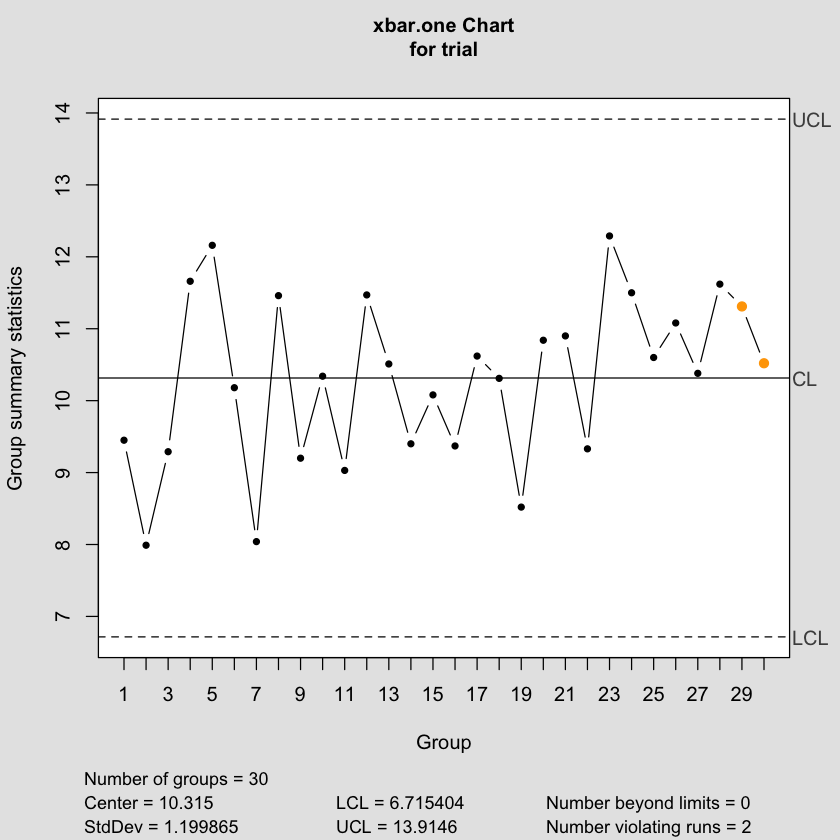

In [49]:
s1 <- qcc(trial, type = "xbar.one")

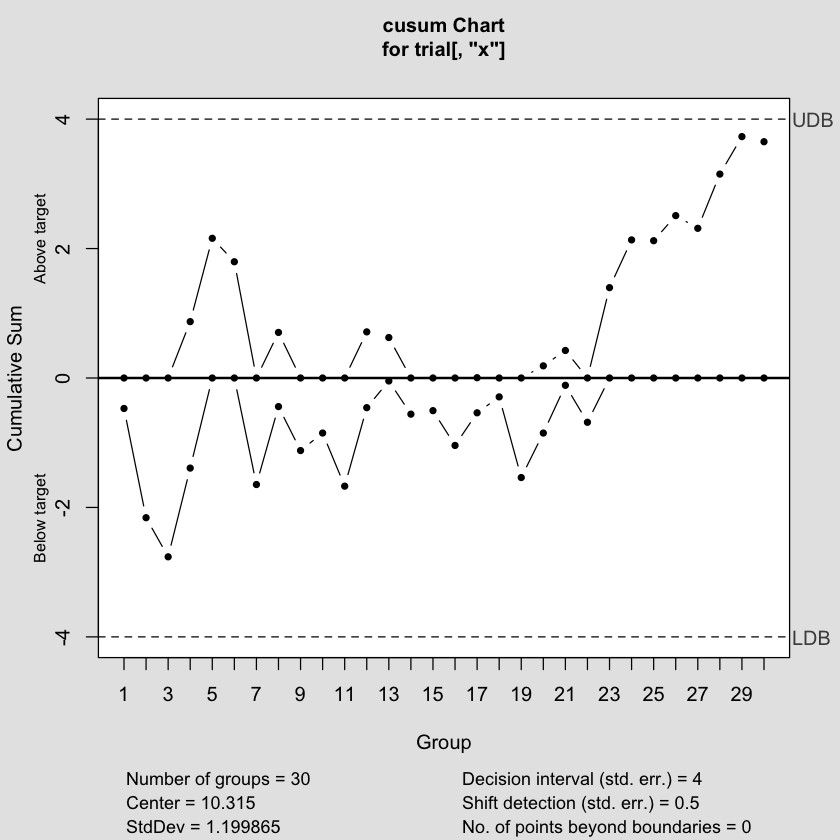

In [50]:
c1 <- cusum(trial[,"x"], decision.interval = 4, se.shift = 1/2)

### CUSUM Charts using QCC

Using the `qcc` package, we plot the CUSUM using the `cusum` function.

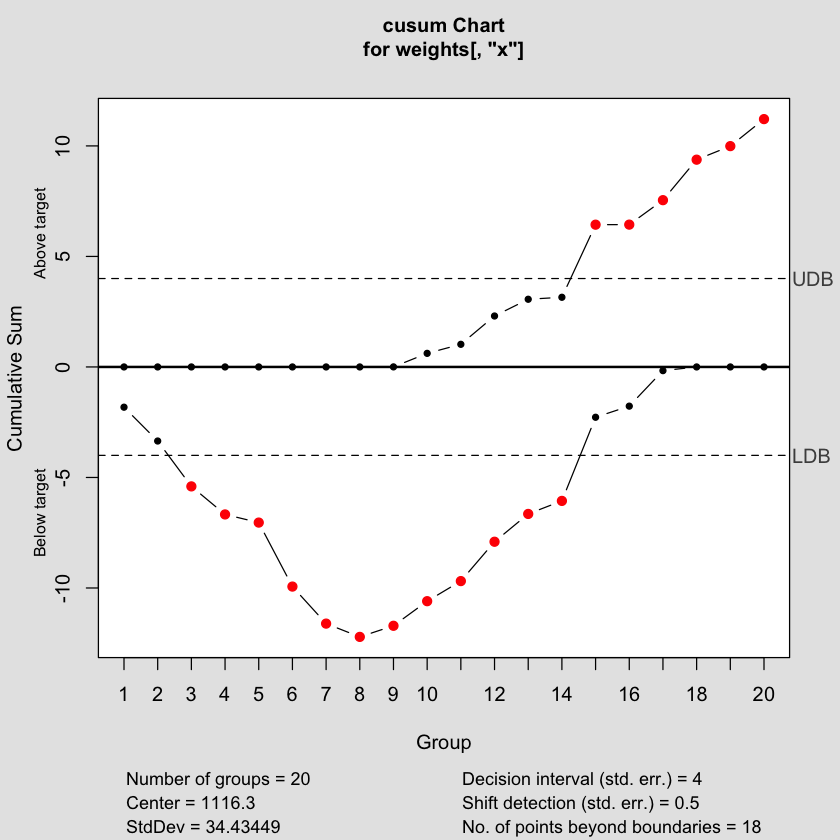

In [51]:
# cusum for the process mean, no assumed value for the variance
c1 <- cusum(weights[,"x"], decision.interval = 4, se.shift = 1/2)

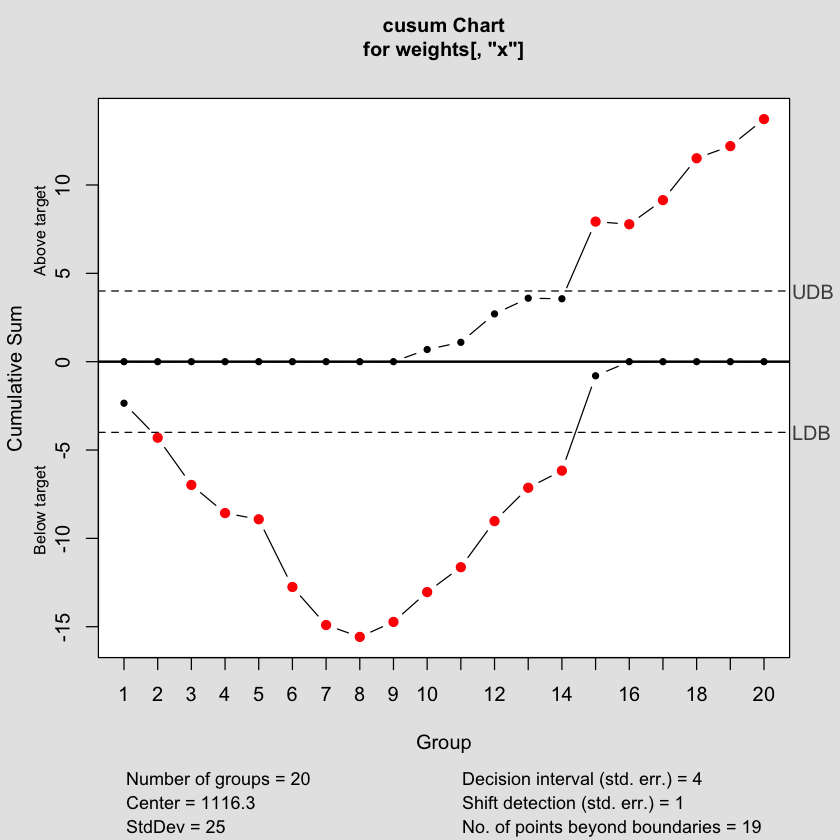

In [52]:
# cusum for the mean, with an assumed value of the variance
c2 <- cusum(weights[,"x"], std.dev = 25, decision.interval = 4, se.shift = 1)

### Phase II Application, Fast Initial Response/Headstart Feature

CUSUM charts are typically preferred for single observation rather than subgrouped data. However, only a minor adjustment is needed to produce the CUSUM chart for multiple observations. See below for the CUSUM chart applied to the Phase I `hardbake` data from Montgomery.

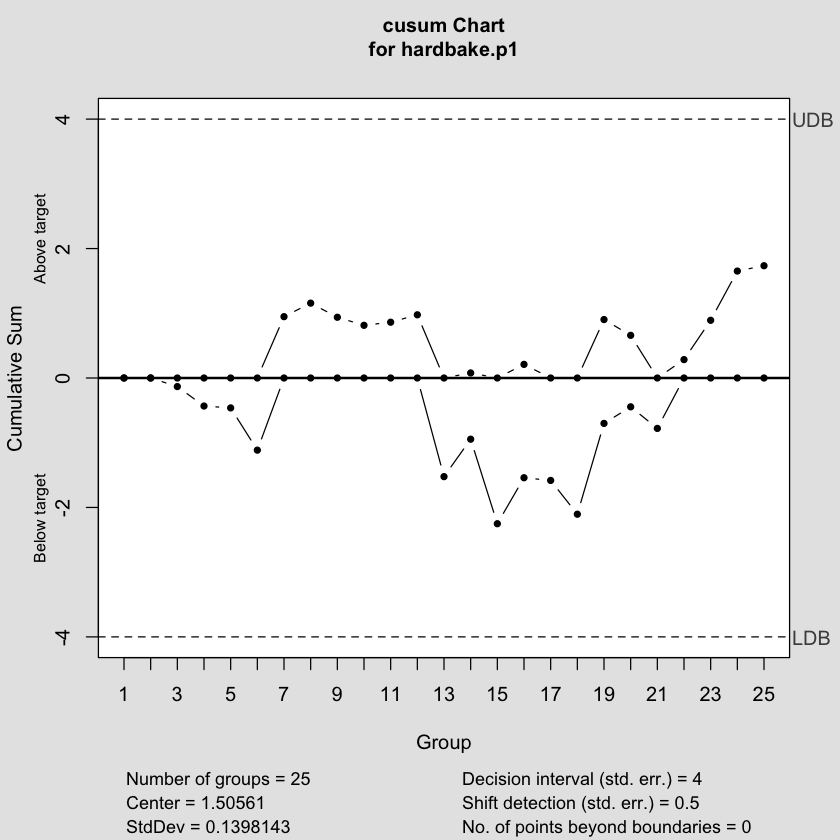

In [53]:
c3 <- cusum(hardbake.p1, decision.interval = 4, se.shift = 0.5)

The Phase II data `hardbake.p2` can be accommodated by using the `newdata` argument in the `cusum` function.

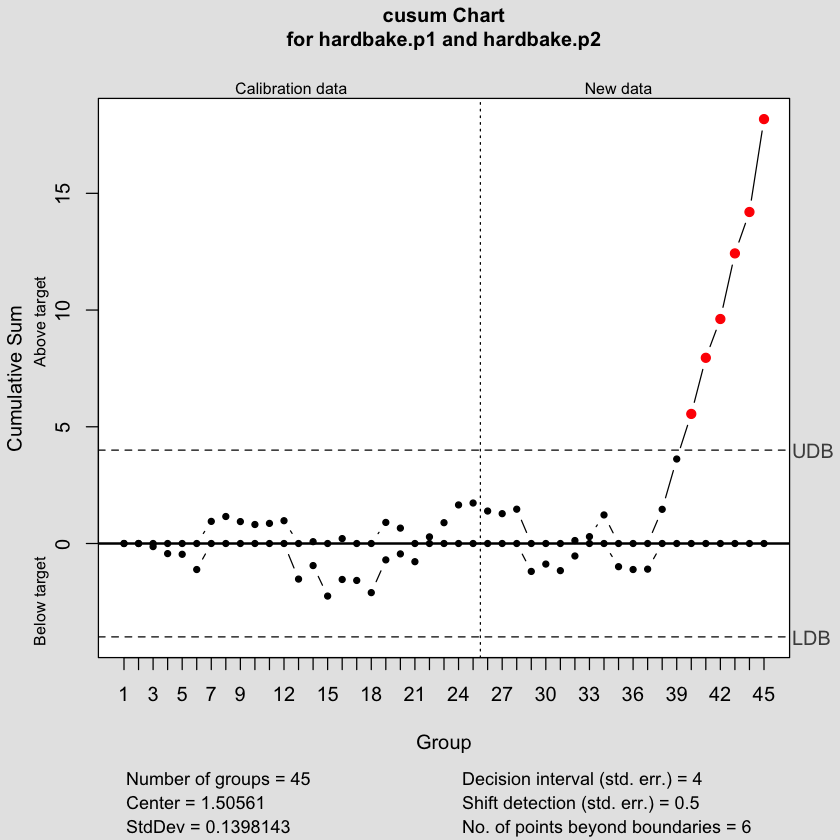

In [54]:
c4 <- cusum(hardbake.p1, decision.interval = 4, se.shift = 0.5,
           newdata = hardbake.p2)

One advantage of the CUSUM chart for Phase II application is the use of a **fast initial response** or a headstart feature. The below code applies the same Phase I/Phase II CUSUM but with a 50% headstart:

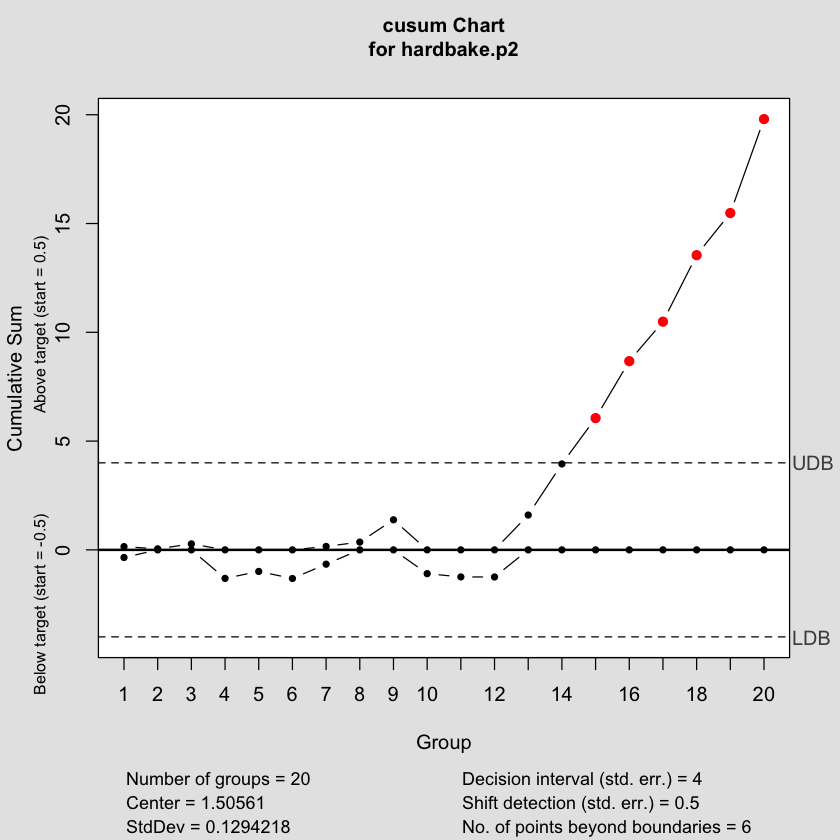

In [55]:
c5 <- cusum(hardbake.p2, limits = c4$limits, center = c4$center, decision.interval = 4, se.shift = 0.5,
           head.start = 0.5)

### Standardized CUSUM

This step is technically redundant because the `qcc` function already gives a standardized CUSUM Chart. But we show this step nevertheless to highlight an advantage of using standardized CUSUMs: plotting process variations.

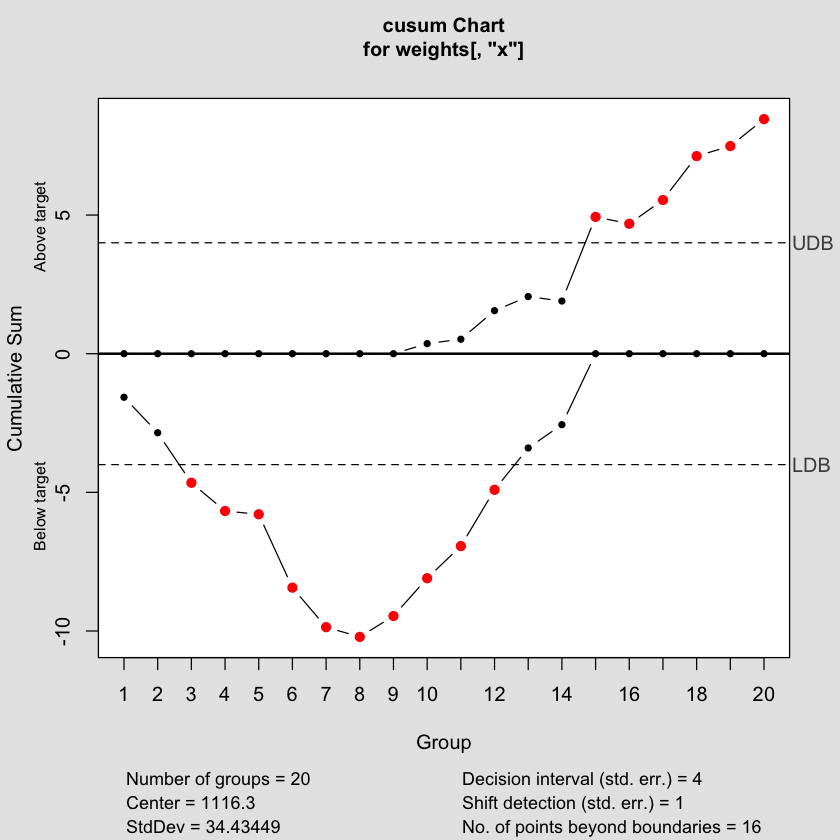

In [56]:
# standardize
weights$z = (1/25)*(weights$x - mean(weights$x))

c4 <- cusum(weights[,"x"], decision.interval = 4, se.shift = 1)

In [57]:
# cusum for the process standard deviation
weights$v <- (sqrt(abs(weights$z)) - 0.822)/0.349

k = 1/2
h = 4

cusum.points = data.frame(
    S = numeric(nrow(weights)),
    Sp = numeric(nrow(weights)),
    Sm = numeric(nrow(weights))
)

for(i in seq_along(weights$v)){

    
    if(i == 1){    
        cusum.points$Sp[i] = max(0, weights$v[i] - k)
        cusum.points$Sm[i] = max(0, (-1 * weights$v[i]) - k)
    }else{
        cusum.points$Sp[i] = max(0, weights$v[i] - k + cusum.points$Sp[i - 1])
        cusum.points$Sm[i] = max(0, (-1 * weights$v[i]) + cusum.points$Sm[i - 1])
    }
}

cusum.points

S,Sp,Sm
0,1.983629,0.0000000
0,3.615109,0.0000000
0,5.862991,0.0000000
0,7.152030,0.0000000
0,6.941539,0.0000000
0,10.049979,0.0000000
0,11.860857,0.0000000
0,12.107532,0.0000000
0,10.942532,0.6649993
0,11.210309,0.0000000


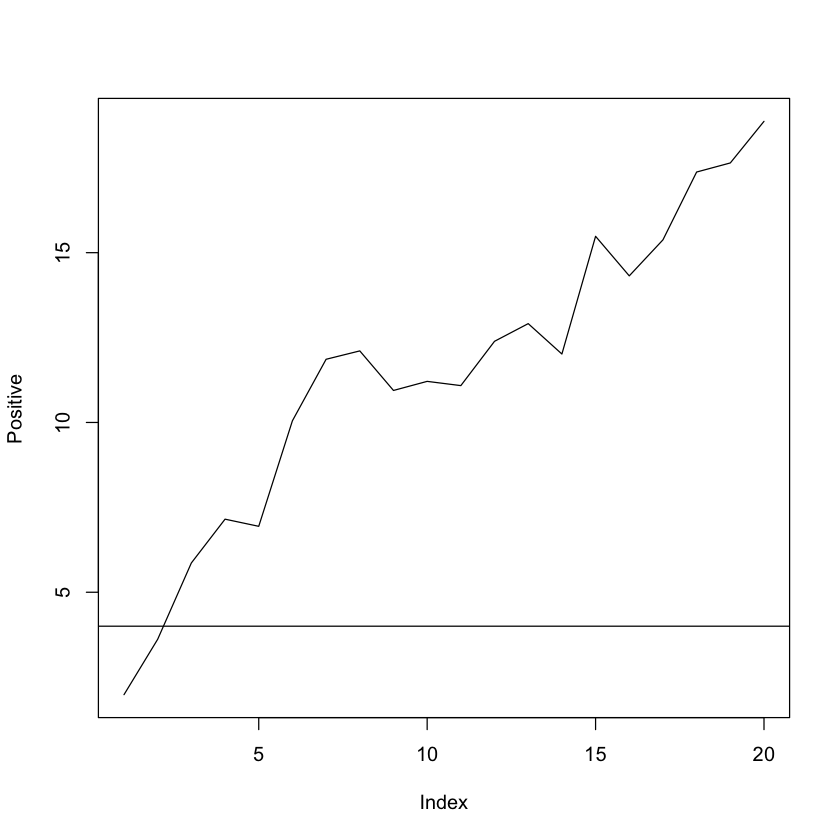

In [58]:
plot(cusum.points$Sp, type = "l", ylab = "Positive")
abline(h = 4)

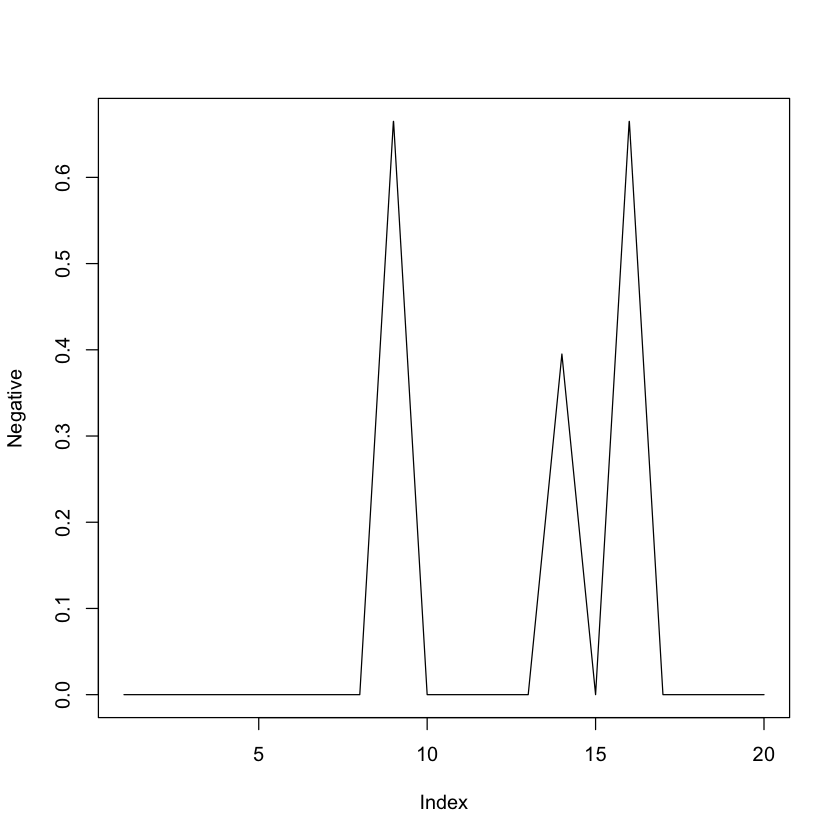

In [59]:
plot(cusum.points$Sm, type = "l", ylab = "Negative")
abline(h = 4)

## EWMA Charts

EWMA Charts are another useful alternative for detecting small shifts in the process mean

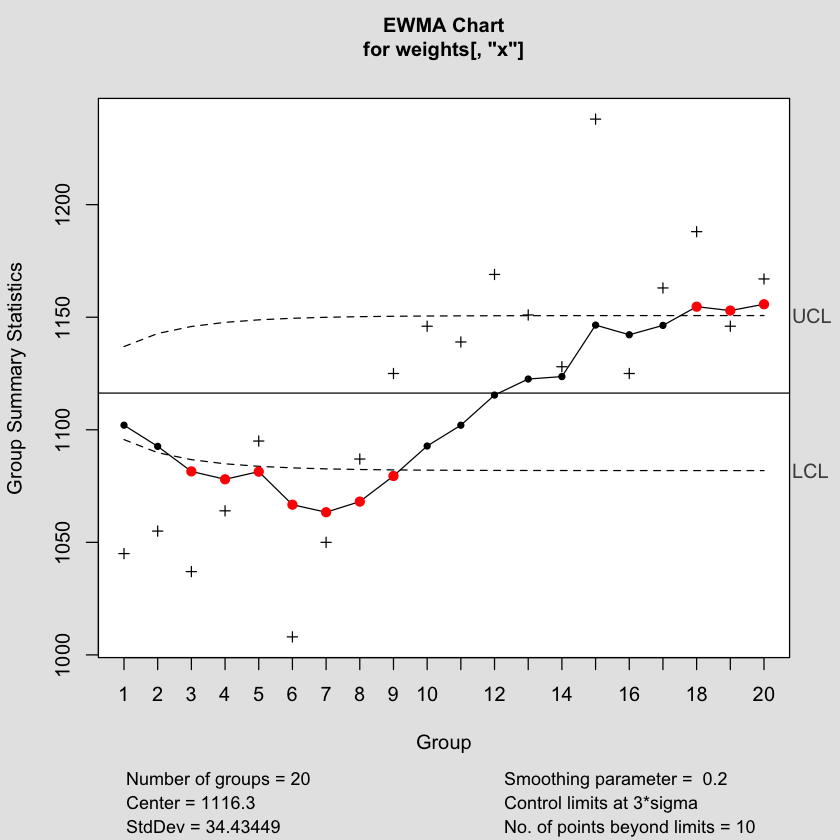

In [60]:
# cusum for the process mean, no assumed value for the variance
e1 <- ewma(weights[,"x"], lambda = 0.2, nsigmas = 3)

Like CUSUM Charts, EWMA charts are usually more commonly preferred for single sample rather than subgrouped data. Although, a minor adjustment allows us to use the subgrouped version. Here we use the EWMA chart on the same `hardbake` data from Montgomery.

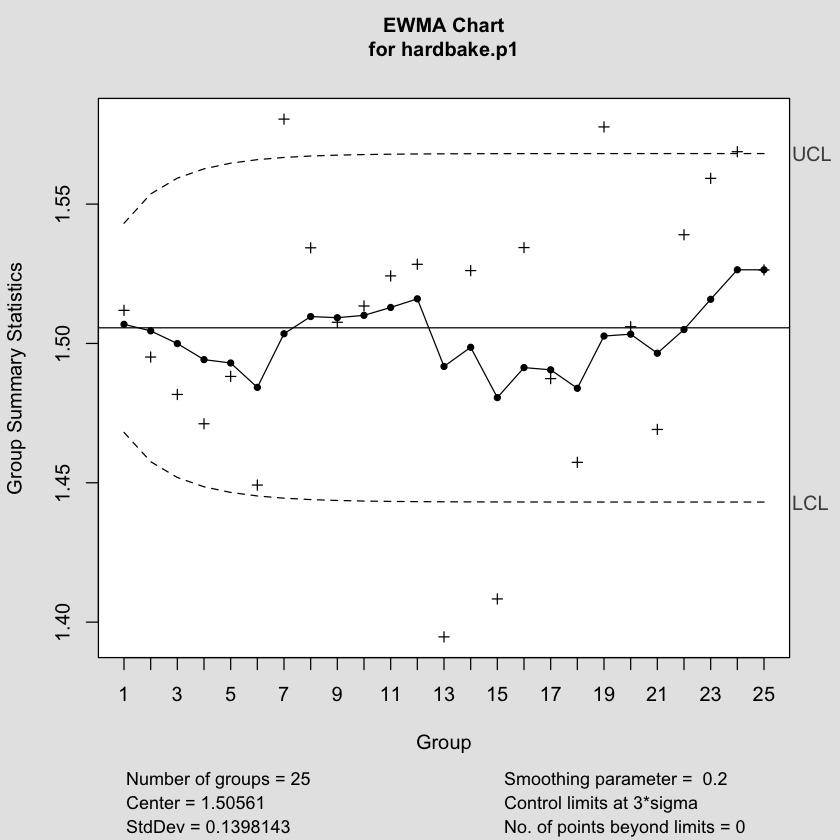

In [61]:
e2 <- ewma(hardbake.p1, lambda = 0.2, nsigmas = 3)

A Phase II run using `hardbake.p2` gives the following charts:

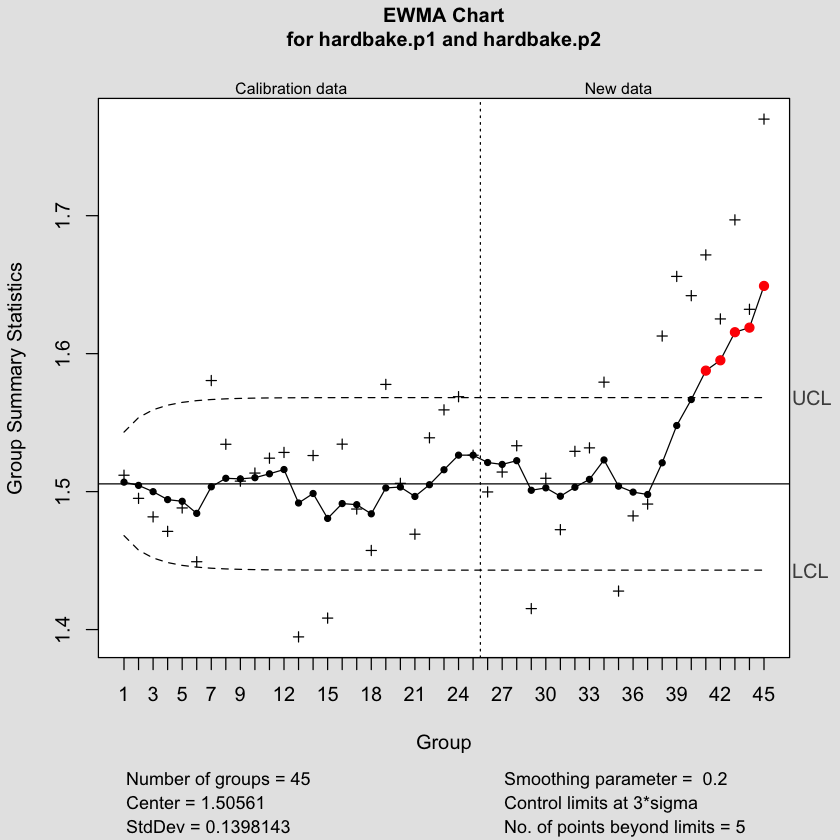

In [62]:
e3 <- ewma(hardbake.p1, lambda = 0.2, nsigmas = 3,
    newdata = hardbake.p2)